In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import random


In [2]:
psl = pd.read_csv(r'C:\Users\dell\Desktop\FYP\Dataset.csv')

In [3]:
psl

,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss decision,Result,dl_applied,Winner,win_by_runs,win_by_wickets,Unnamed: 13
0,1,3,Dubai,22-02-2018,Multan Sultan,Peshawar Zalmi,Multan Sultan,Field,normal,0,Multan Sultan,0,7,NaN
1,2,3,Dubai,23-02-2018,Quetta Gladiators,Karachi Kings,Karachi Kings,Bat,normal,0,Karachi Kings,19,0,NaN
2,3,3,Dubai,23-02-2018,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,43,0,NaN
3,4,3,Dubai,24-02-2028,Peshawar Zalmi,Islamabad United,Islamabad United,Field,normal,0,Peshawar Zalmi,34,0,NaN
4,5,3,Dubai,24-02-2018,Lahore Qalander,Quetta Gladiators,Quetta Gladiators,Field,normal,0,Quetta Gladiators,0,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,7,Lahore,21-02-2022,Lahore Qalander,Peshawar Zalmi,Peshawar Zalmi,Bat,normal,0,Peshawar Zalmi,3,0,NaN
166,167,7,Lahore,23-02-2022,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,28,0,NaN
167,168,7,Lahore,24-02-2022,Peshawar Zalmi,Islamabad United,Peshawar Zalmi,Bat,normal,0,Islamabad United,0,5,NaN
168,169,7,Lahore,25-02-2022,Lahore Qalander,Islamabad United,Lahore Qalander,Bat,normal,0,Lahore Qalander,6,0,NaN


In [4]:
psl.head()

,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss decision,Result,dl_applied,Winner,win_by_runs,win_by_wickets,Unnamed: 13
0,1,3,Dubai,22-02-2018,Multan Sultan,Peshawar Zalmi,Multan Sultan,Field,normal,0,Multan Sultan,0,7,NaN
1,2,3,Dubai,23-02-2018,Quetta Gladiators,Karachi Kings,Karachi Kings,Bat,normal,0,Karachi Kings,19,0,NaN
2,3,3,Dubai,23-02-2018,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,43,0,NaN
3,4,3,Dubai,24-02-2028,Peshawar Zalmi,Islamabad United,Islamabad United,Field,normal,0,Peshawar Zalmi,34,0,NaN
4,5,3,Dubai,24-02-2018,Lahore Qalander,Quetta Gladiators,Quetta Gladiators,Field,normal,0,Quetta Gladiators,0,9,NaN


In [5]:
psl.describe()

,ID,Season,dl_applied,win_by_runs,win_by_wickets
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,85.500000,5.000000,0.005882,12.658824,3.429412
std,49.218899,1.418391,0.076696,21.839681,3.327893
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,43.250000,4.000000,0.000000,0.000000,0.000000
50%,85.500000,5.000000,0.000000,0.000000,4.000000
75%,127.750000,6.000000,0.000000,19.000000,6.000000
max,170.000000,7.000000,1.000000,117.000000,10.000000


In [6]:
psl.isnull().sum()

ID                  0
Season              0
City                0
Date                0
Team 1              0
Team 2              0
Toss Winner         3
Toss decision       3
Result              4
dl_applied          0
Winner              4
win_by_runs         0
win_by_wickets      0
Unnamed: 13       169
dtype: int64

In [7]:
psl = psl.iloc[:,:-1]

In [8]:
psl.dropna(inplace=True)

In [9]:
psl

,ID,Season,City,Date,Team 1,Team 2,Toss Winner,Toss decision,Result,dl_applied,Winner,win_by_runs,win_by_wickets
0,1,3,Dubai,22-02-2018,Multan Sultan,Peshawar Zalmi,Multan Sultan,Field,normal,0,Multan Sultan,0,7
1,2,3,Dubai,23-02-2018,Quetta Gladiators,Karachi Kings,Karachi Kings,Bat,normal,0,Karachi Kings,19,0
2,3,3,Dubai,23-02-2018,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,43,0
3,4,3,Dubai,24-02-2028,Peshawar Zalmi,Islamabad United,Islamabad United,Field,normal,0,Peshawar Zalmi,34,0
4,5,3,Dubai,24-02-2018,Lahore Qalander,Quetta Gladiators,Quetta Gladiators,Field,normal,0,Quetta Gladiators,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,7,Lahore,21-02-2022,Lahore Qalander,Peshawar Zalmi,Peshawar Zalmi,Bat,normal,0,Peshawar Zalmi,3,0
166,167,7,Lahore,23-02-2022,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,28,0
167,168,7,Lahore,24-02-2022,Peshawar Zalmi,Islamabad United,Peshawar Zalmi,Bat,normal,0,Islamabad United,0,5
168,169,7,Lahore,25-02-2022,Lahore Qalander,Islamabad United,Lahore Qalander,Bat,normal,0,Lahore Qalander,6,0


In [10]:
psl["Team 1"].unique()

array(['Multan Sultan', 'Quetta Gladiators', 'Lahore Qalander',
       'Peshawar Zalmi', 'Islamabad United', 'Karachi Kings'],
      dtype=object)

In [11]:
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Number of  PSL  matches won by each team')

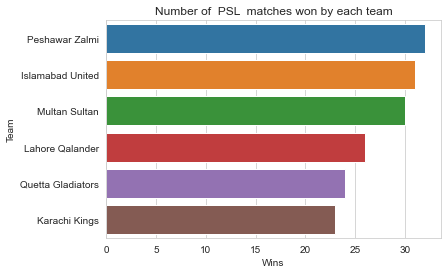

In [12]:
sns.countplot(y ='Winner',data=psl,order= psl['Winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  PSL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different Cities')

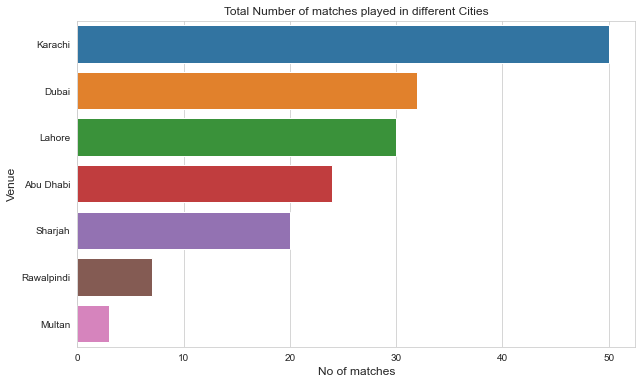

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(y = psl['City'],data = psl,order = psl['City'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different Cities')

Text(0.5, 1.0, 'Toss Decision')

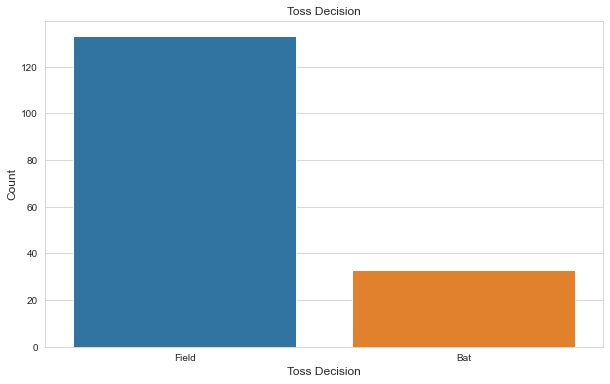

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Toss decision", data=psl)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [15]:
x = ["City", "Toss decision"]
for i in x:
  print("------------")
  print(psl[i].unique())
  print(psl[i].value_counts())

------------
['Dubai' 'Sharjah' 'Lahore' 'Karachi' 'Abu Dhabi' 'Multan' 'Rawalpindi']
Karachi       50
Dubai         32
Lahore        30
Abu Dhabi     24
Sharjah       20
Rawalpindi     7
Multan         3
Name: City, dtype: int64
------------
['Field' 'Bat']
Field    133
Bat       33
Name: Toss decision, dtype: int64


In [16]:
psl.drop(['ID','Date'], axis=1, inplace=True)

In [17]:
psl

,Season,City,Team 1,Team 2,Toss Winner,Toss decision,Result,dl_applied,Winner,win_by_runs,win_by_wickets
0,3,Dubai,Multan Sultan,Peshawar Zalmi,Multan Sultan,Field,normal,0,Multan Sultan,0,7
1,3,Dubai,Quetta Gladiators,Karachi Kings,Karachi Kings,Bat,normal,0,Karachi Kings,19,0
2,3,Dubai,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,43,0
3,3,Dubai,Peshawar Zalmi,Islamabad United,Islamabad United,Field,normal,0,Peshawar Zalmi,34,0
4,3,Dubai,Lahore Qalander,Quetta Gladiators,Quetta Gladiators,Field,normal,0,Quetta Gladiators,0,9
...,...,...,...,...,...,...,...,...,...,...,...
165,7,Lahore,Lahore Qalander,Peshawar Zalmi,Peshawar Zalmi,Bat,normal,0,Peshawar Zalmi,3,0
166,7,Lahore,Lahore Qalander,Multan Sultan,Lahore Qalander,Field,normal,0,Multan Sultan,28,0
167,7,Lahore,Peshawar Zalmi,Islamabad United,Peshawar Zalmi,Bat,normal,0,Islamabad United,0,5
168,7,Lahore,Lahore Qalander,Islamabad United,Lahore Qalander,Bat,normal,0,Lahore Qalander,6,0


In [18]:
X = psl.drop(["Winner"], axis=1)
y = psl["Winner"]

In [19]:
X = pd.get_dummies(X, ["Team 1","Team 2", "Toss Winner", "Toss decision", "Result",'City'], drop_first = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.90)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,min_samples_split=3,random_state=42,max_depth=4,max_features = "auto")

In [23]:
model.fit(x_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_split=3,
                       random_state=42)

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [26]:
ac

0.7647058823529411

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=5, max_depth=5,subsample=1)

In [29]:
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=5, max_depth=5, n_estimators=150,
                           subsample=1)

In [30]:
y_pred = gb_clf.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.12%


In [32]:
import pickle
pickle.dump(gb_clf, open("gb1.pickle.dat", "wb"))

In [33]:
loaded_model = pickle.load(open("gb1.pickle.dat", "rb"))

In [34]:
y_pred = loaded_model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.12%


In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_clf = AdaBoostClassifier(n_estimators=1500, learning_rate=0.8, random_state=42)

In [38]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=1500, random_state=42)

In [39]:
y_pred = ada_clf.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 64.71%


In [41]:
from sklearn.svm import SVC

In [42]:
svm_clf = SVC(kernel='linear', C=2.0, gamma='auto', random_state=42,)

In [43]:
svm_clf.fit(x_train, y_train)

SVC(C=2.0, gamma='auto', kernel='linear', random_state=42)

In [44]:
y_pred = svm_clf.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 70.59%


In [46]:
import xgboost as xgb

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
y_train=le.fit_transform(y_train)

In [49]:
params = {
    'objective': 'multi:softmax',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 150,'min_child_weight': 1,
    'eval_metric': 'logloss','subsample': 0.8,'colsample_bytree': 0.8,'gamma': 0.4,
    'seed': 42
}

In [50]:
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.4, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [51]:
y_pred = xgb_model.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)

In [53]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.24%


In [54]:
import pickle
pickle.dump(y_pred, open("xgb1.pickle.dat", "wb"))

In [55]:
loaded_model = pickle.load(open("xgb1.pickle.dat", "rb"))

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.24%


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=50,weights='distance',algorithm='auto', p=1)

In [59]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50, p=1, weights='distance')

In [60]:
y_pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 52.94%
